### Time Series plotting

This notebook is based on DataCamp Data Visualization course on Time series ploting using Matplotlib.
https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./data/climate_change.csv', index_col = 'date', parse_dates=['date'])
def cleanColumnHeader(df):
    print(f"Old column name {df.columns}")
    df.columns = [re.sub(" ", "_", re.sub(" {1,}", " ", re.sub("/", " ", str(col)))) for col in df.columns]
    print(f"New column name {df.columns}")

if df.shape[0] > 0:
    print(f"File successfully imported")
    cleanColumnHeader(df)
    
df.head()
#df.info()

File successfully imported
Old column name Index(['co2', 'relative_temp'], dtype='object')
New column name Index(['co2', 'relative_temp'], dtype='object')


,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


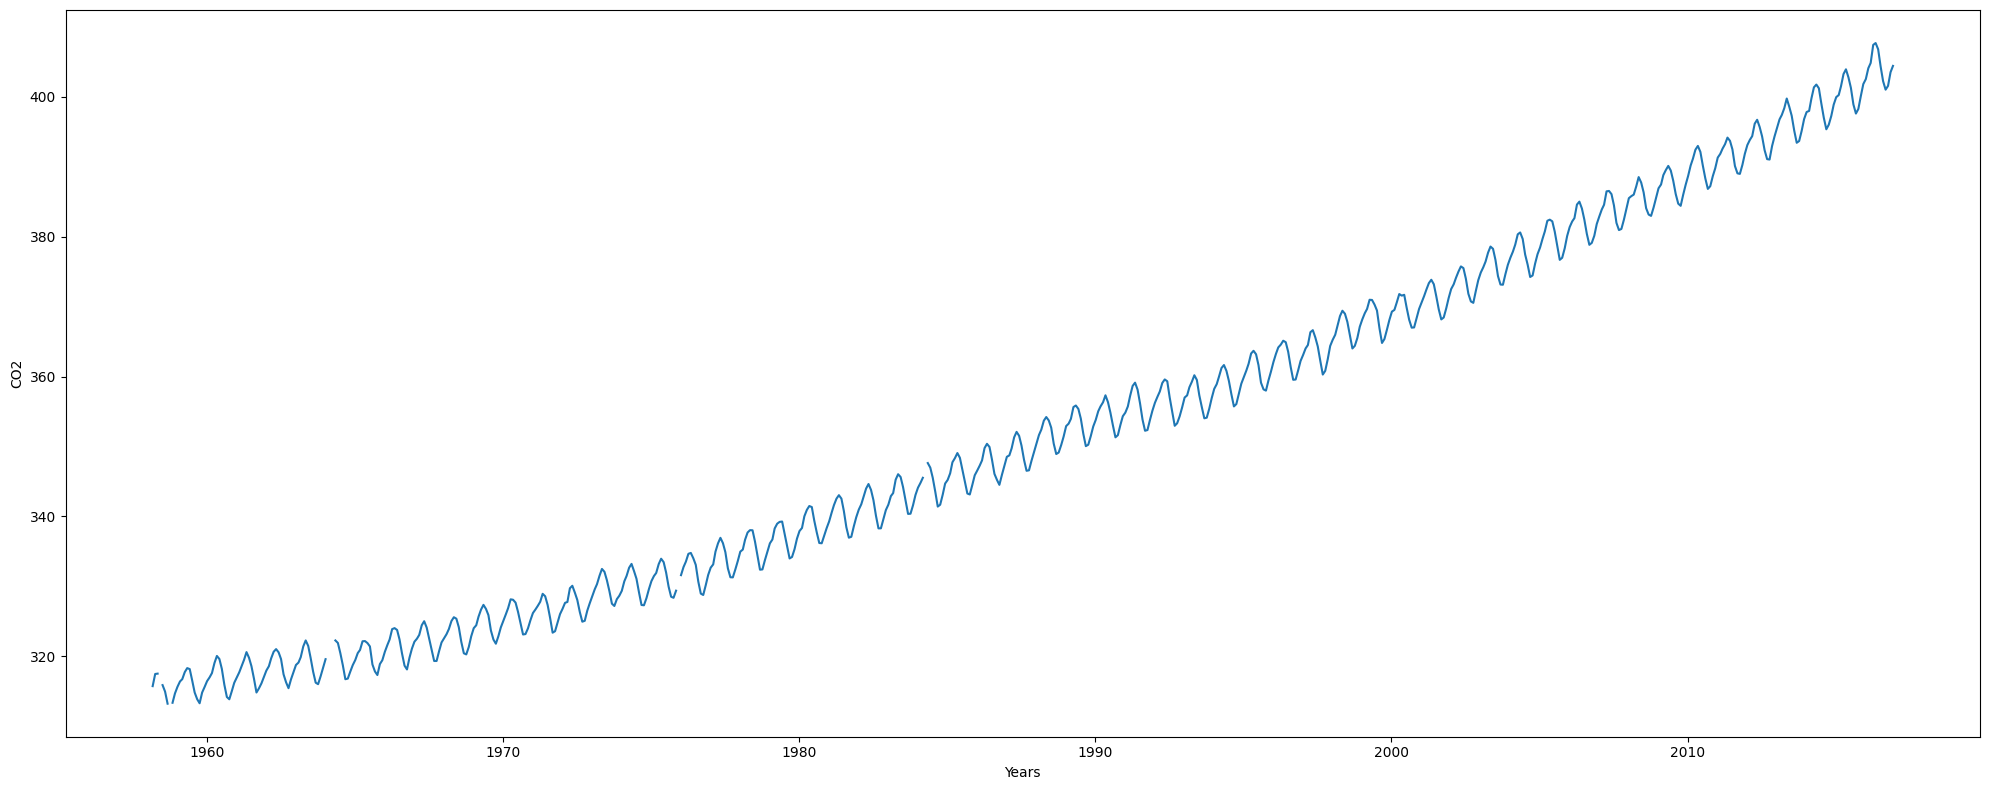

In [3]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df.index, df['co2'])
ax.set_xlabel("Years")
ax.set_ylabel("CO2")
plt.style.use('ggplot')
fig.tight_layout()
#plt.show()
plt.savefig("Climate_change_time_series_basic_plot.png")



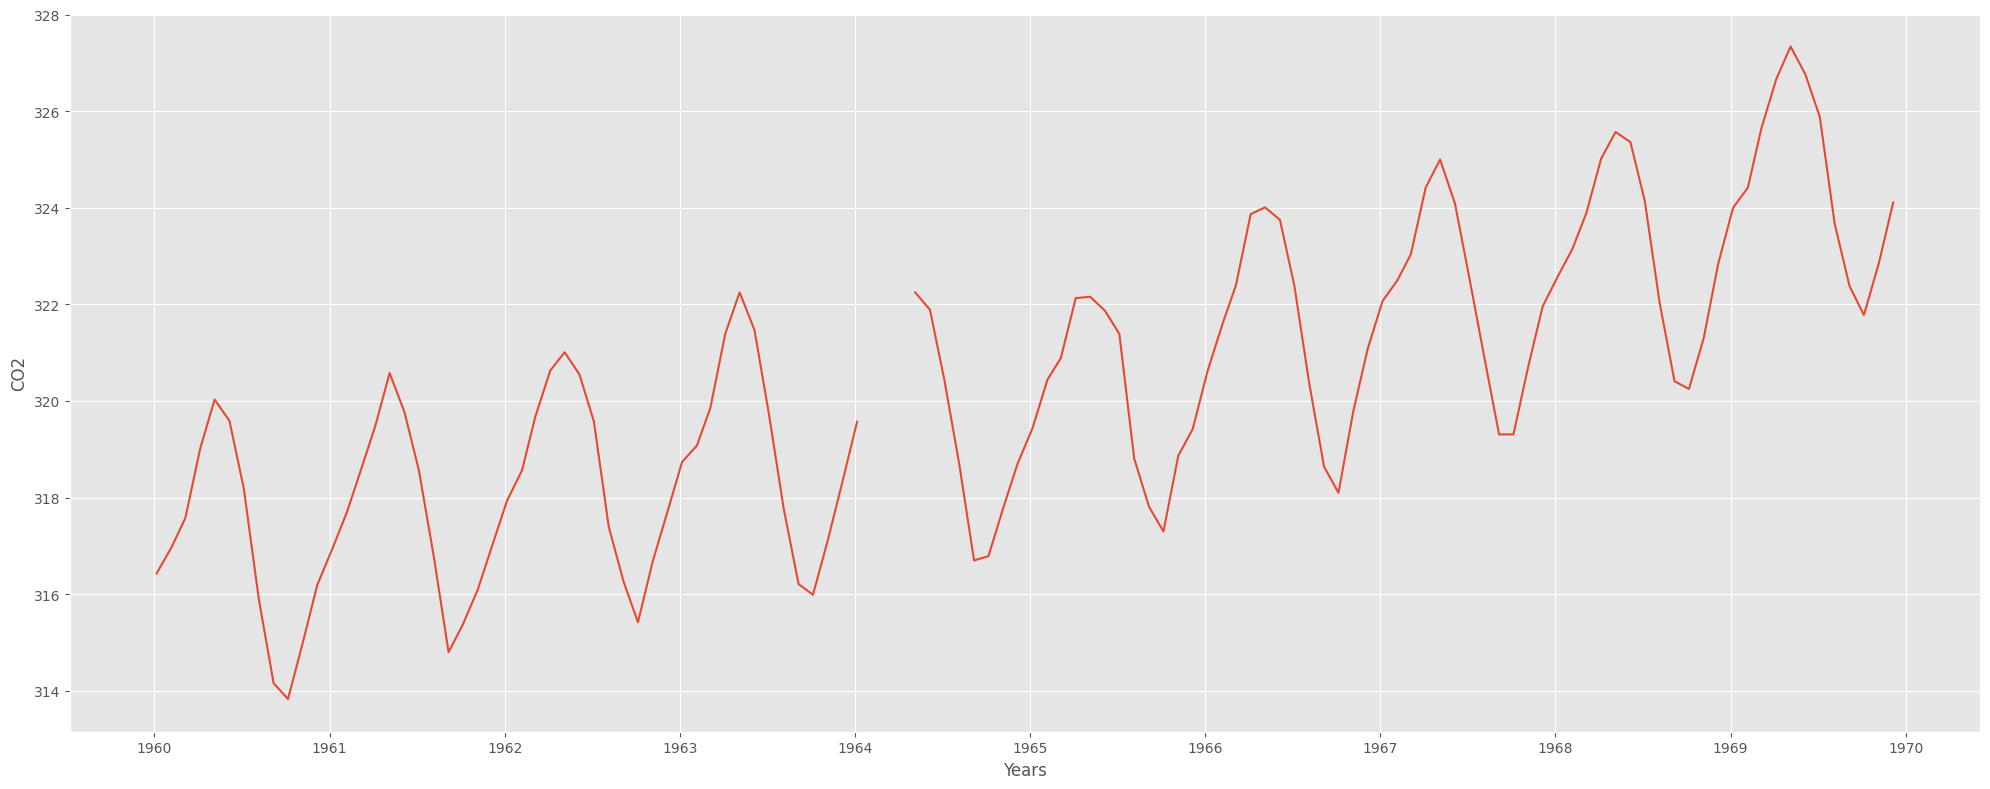

In [4]:

sixties = df['1960-01-01':'1969-12-31']
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel("Years")
ax.set_ylabel("CO2")
plt.style.use('ggplot')
fig.tight_layout()
plt.show()

In [6]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color = color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

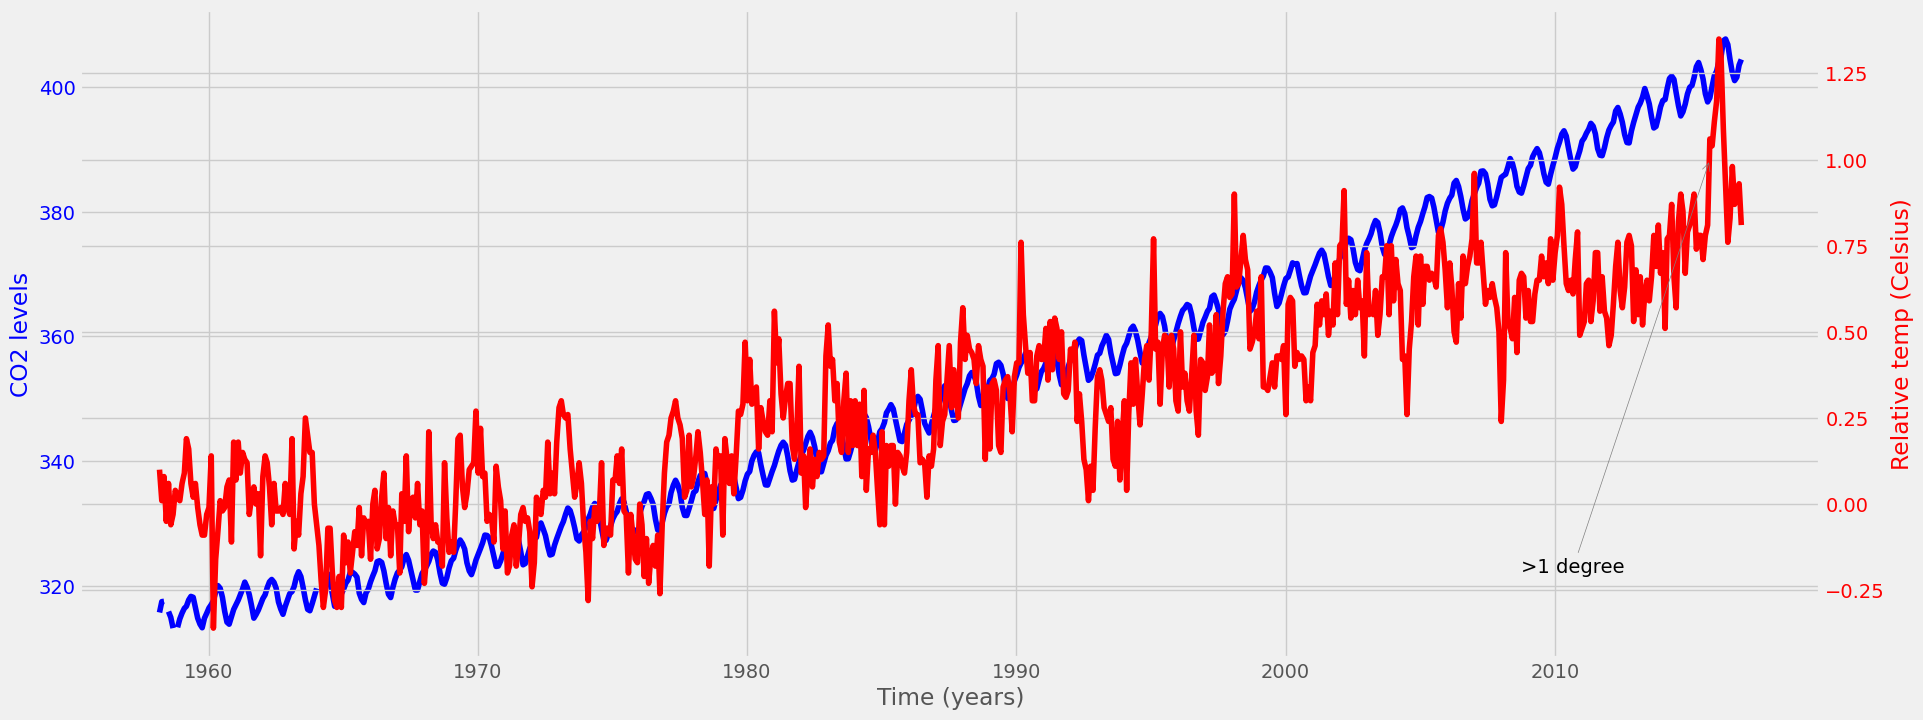

In [12]:
fig, ax = plt.subplots(figsize = (20,8))
plt.style.use('fivethirtyeight')

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, df.index, df.co2, 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, df.index, df.relative_temp, 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xytext=(pd.Timestamp('2008-10-06'),-0.2) , xy=(pd.Timestamp('2015-10-06'),1) , arrowprops={'arrowstyle': '->', 'color': 'gray'})

plt.savefig("Climate_change_time_series_annotated_plot.png")
plt.show()